In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import prepare as p

import warnings
warnings.filterwarnings("ignore")

import acquire as a


## Using your store items data:

In [4]:
if os.path.isfile('tsa_store_data.csv'):
    print('File exists, pulling from system.')
    store = pd.read_csv('tsa_store_data.csv')
else:
    print('File does not exist, extracting from MySQL.')
    store = a.get_store_data()

File exists, pulling from system.


In [5]:
store.dtypes

store_id           int64
item_id            int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_date         object
sale_amount        int64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
dtype: object

## 1. Convert date column to datetime format.

In [ ]:
store.sale_date = store.sale_date.astype('datetime64[ns]')

## 2. Plot the distribution of sale_amount and item_price.

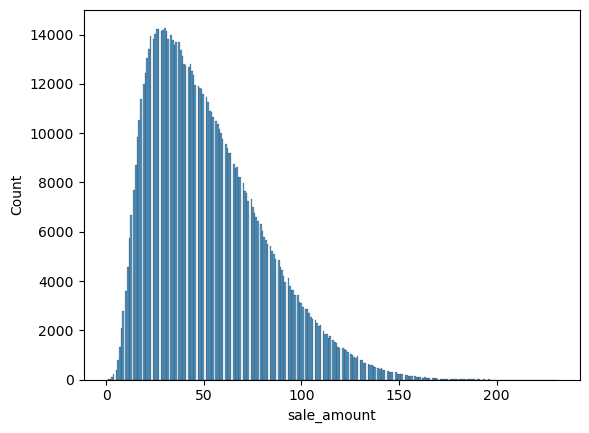

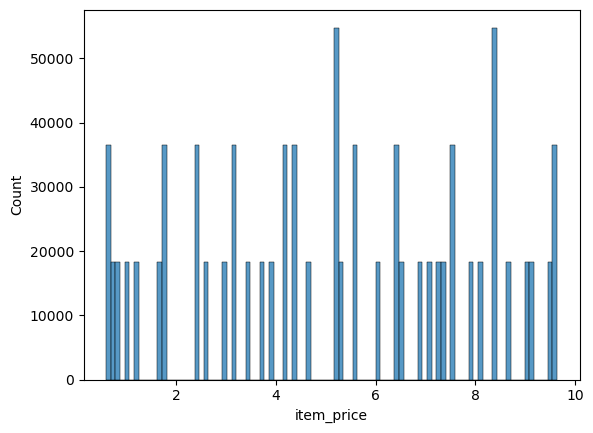

In [8]:
cols = ['sale_amount','item_price']
for col in cols:
    sns.histplot(data=store,x=col)
    plt.show()

## 3. Set the index to be the datetime variable.

In [9]:
store = store.set_index('sale_date')

## 4. Add a 'month' and 'day of week' column to your dataframe.

In [10]:
store['month'] = store.index.month
store['year'] = store.index.year

## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [11]:
store['sales_total'] = store.sale_amount + store.item_price

## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
store = p.prepare_store(store)

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [12]:
opsd = pd.read_csv('opsd_germany.csv')

In [13]:
opsd.columns = opsd.columns.str.lower()


## 1. Convert date column to datetime format.

In [14]:
opsd.date = opsd.date.astype('datetime64[ns]')

## 2. Plot the distribution of each of your variables.

In [15]:
opsd.head()

,unnamed: 0,date,consumption,wind,solar,wind+solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


Distributions for: unnamed: 0


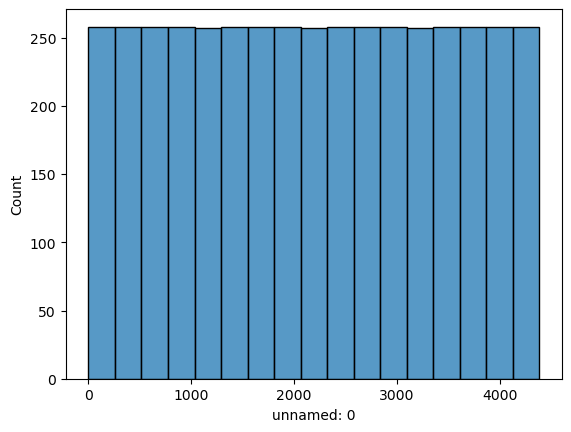

Distributions for: date


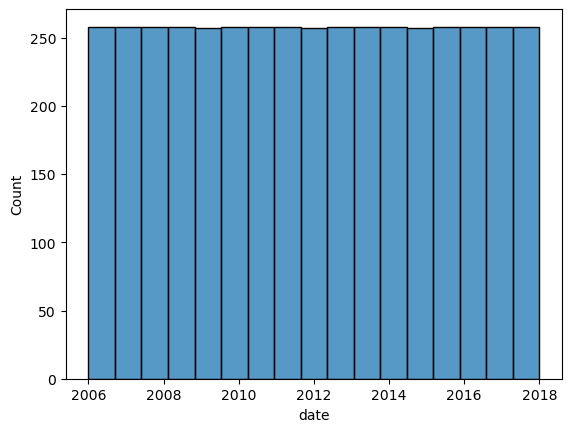

Distributions for: consumption


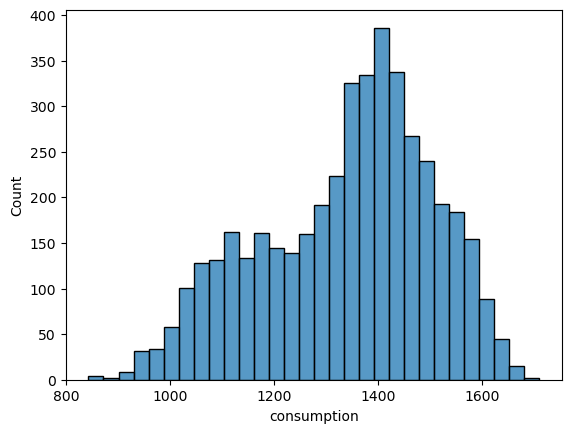

Distributions for: wind


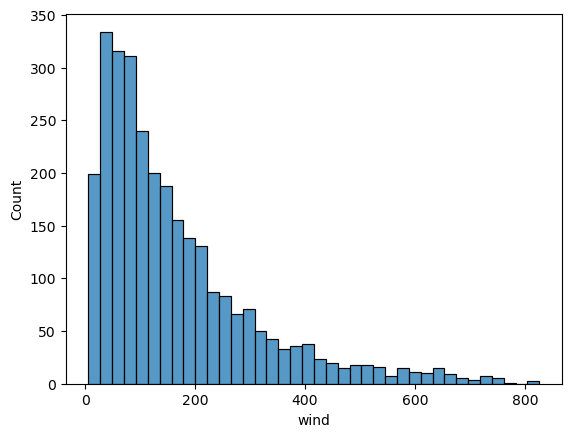

Distributions for: solar


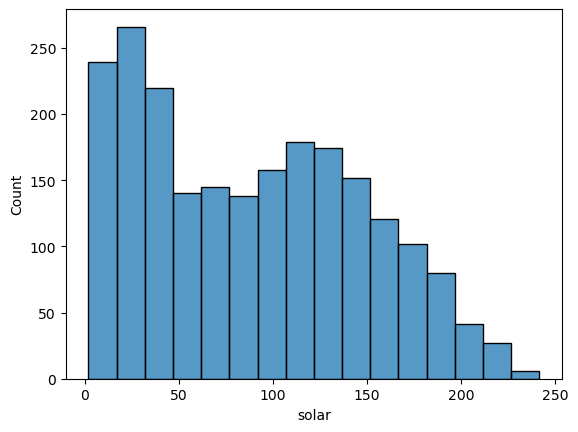

Distributions for: wind+solar


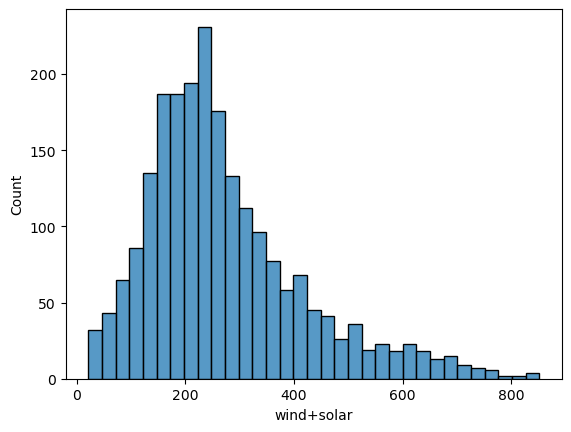

In [16]:
for col in opsd.columns:
    sns.histplot(data=opsd, x=col)
    print(f'Distributions for: {col}')
    plt.show()

## 3. Set the index to be the datetime variable.

In [17]:
opsd = opsd.set_index('date')

## 4. Add a month and a year column to your dataframe.

In [18]:
opsd['month'] = opsd.index.month 
opsd['year'] = opsd.index.year

## 5. Fill any missing values.

In [19]:
opsd.isna().sum()

unnamed: 0        0
consumption       0
wind           1463
solar          2195
wind+solar     2196
month             0
year              0
dtype: int64

In [20]:
opsd.backfill(inplace=True)

## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
opsd = p.prepare_opsd(opsd)